#Chapter 1: Classification

Machine learning broadly categorized into two types:<br>
<ul>
  <li>Supervised learning: trained on labeled data</li>
    <ul>
      <li>Classification: target variable consists of categories</li>
      <li>Regression: target variable comprised of continuous data</li>
    </ul>

  <li>Unsupervised learning: trained on unlabeled data</li>
    <ul>
      <li>Clustering</li>
      <li>Association</li>
      <li>Dimensionality reduction</li>
    </ul>
</ul>

Terms: <br>
<ul>
  <li>Feature = predictor variable = independent variable </li>
  <li>Target variable = response variable = dependent variable </li>
</ul>

###Before using supervised learning:
<ul>
  <li>Requirements:</li>
  <ul>
    <li>No missing values</li>
    <li>Data in numeric format</li>
    <li>Data stored in pandas DataFrame or NumPy array</li>
    <ul>
      <li> columns are features </li>
      <li> rows are observations </li>
    </ul>
  </ul>
  <li>Perform Exploratory Data Analysis (EDA)
</ul>

```python
#The below call is a generalization, not an actual import call
from sklearn.module import Model

model = Model()
model.fit(X,y)
predictions = model.predict(X_new)
print(predictions)
```

##Classifying labels of unseen data
<ol>
  <li>Build a model</li>
  <li>Train model with labeled (training) data</li>
  <li>Pass unseen, unlabeled data to model</li>
  <li>Model predicts labels of unseen data</li>
</ol>



###k-Nearest Neighbors
Look at k-nearest labeled data points to determine label of unlabeled data point <br>
Label of unlabeled data point determined by vote of k-nearest neighbors <br>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

churn_df = pd.read_csv('sample_data/telecom_churn_clean.csv')

#convert DataFrames to Numpy arrays with '.values'
X = churn_df[["total_day_charge","total_eve_charge"]].values
y = churn_df["churn"].values

"""Target data must be a single column with the same number of rows
   (observations) as the feature data"""

print(X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

print(X_new.shape)

predictions = knn.predict(X_new)
print(f'Predictions: {predictions}')

(3333, 2) (3333,)
(3, 2)
Predictions: [1 0 0]


##Measuring model performance
<ul>
  <li>$accuracy = \frac{correct \ predictions}{total \ observations}$ </li>
</ul>

Important to measure model performance on data not included in the training data set <br>
Common practice is to split the labeled data into: <ul>
  <li>70-80% training data </li>
  <li>20-30% testing data</li>
</ul>



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)
"""random_state sets the random seed. This allows for reproducibility when
    using the same seed. stratify ensure the overall trend of the data is
    reflected in the test and training sets."""

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.874


##Model complexity
<ul>
  <li>Larger k = less model complexity
  <ul>
    <li>possible underfitting</li>
    <li>Decision boundary less affected by individual observations.</li>
    <li>Model less able to detect relationships in the dataset</li>
  </ul>
  <li>Smaller k = more model complexity</li>
  <ul>  
    <li>possible overfitting</li>
    <li>model can be more sensitive to noise in the training data,<br> rather than reflecting general trends</li>
  </ul>
</ul>

Can use model complexity curve to interpret k. Observe model performance for a range of k values.

In [ ]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
print(type(neighbors))
print(neighbors)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

print(train_accuracies)
print(test_accuracies)

<class 'numpy.ndarray'>
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
{1: 1.0, 2: 0.9061294470638662, 3: 0.9031290184312044, 4: 0.8876982426060865, 5: 0.8911273039005573, 6: 0.8838405486498071, 7: 0.8829832833261895, 8: 0.8829832833261895, 9: 0.8821260180025718, 10: 0.87912558936991, 11: 0.8782683240462923, 12: 0.87912558936991, 13: 0.8778396913844835, 14: 0.8769824260608658, 15: 0.8786969567081011, 16: 0.8774110587226747, 17: 0.876553793399057, 18: 0.8774110587226747, 19: 0.8761251607372482, 20: 0.8778396913844835, 21: 0.8752678954136305, 22: 0.8756965280754393, 23: 0.8748392627518217, 24: 0.8761251607372482, 25: 0.876553793399057}
{1: 0.824, 2: 0.86, 3: 0.863, 4: 0.869, 5: 0.865, 6: 0.874, 7: 0.878, 8: 0.877, 9: 0.878, 10: 0.879, 11: 0.883, 12: 0.882, 13: 0.884, 14: 0.88, 15: 0.879, 16: 0.88, 17: 0.882, 18: 0.882, 19: 0.879, 20: 0.88, 21: 0.879, 22: 0.88, 23: 0.879, 24: 0.879, 25: 0.88}


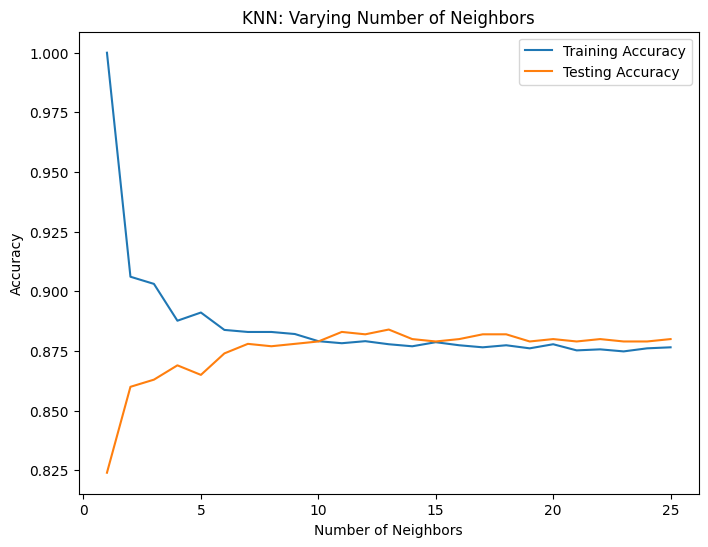

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

<Figure size 640x480 with 0 Axes>

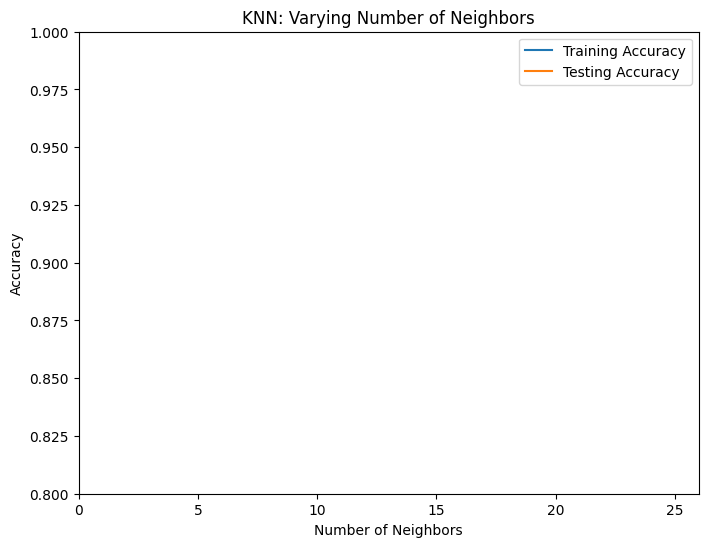

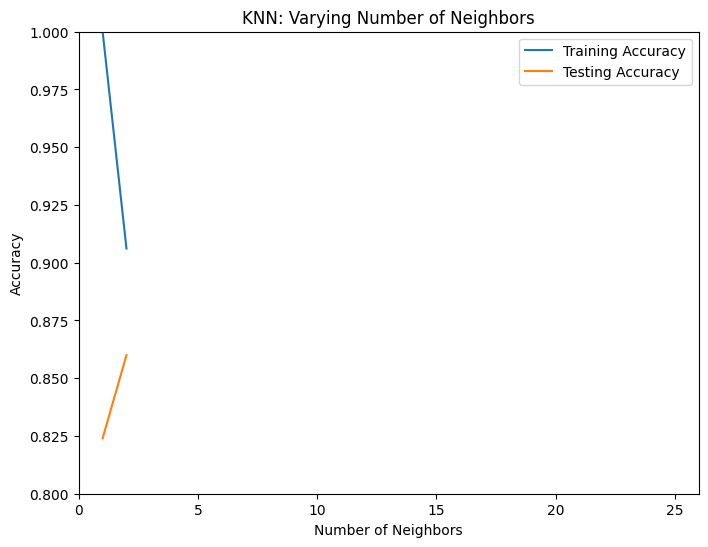

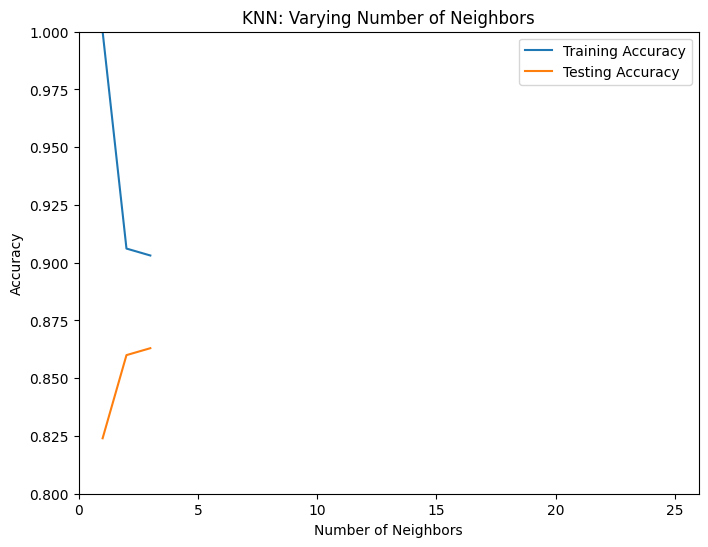

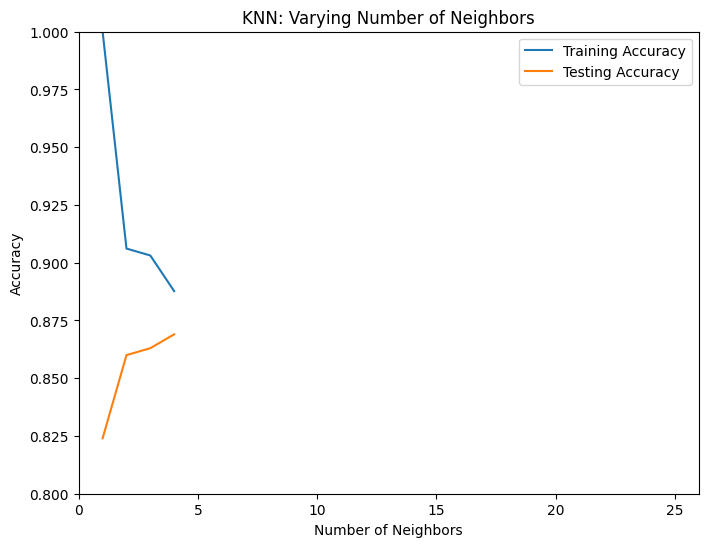

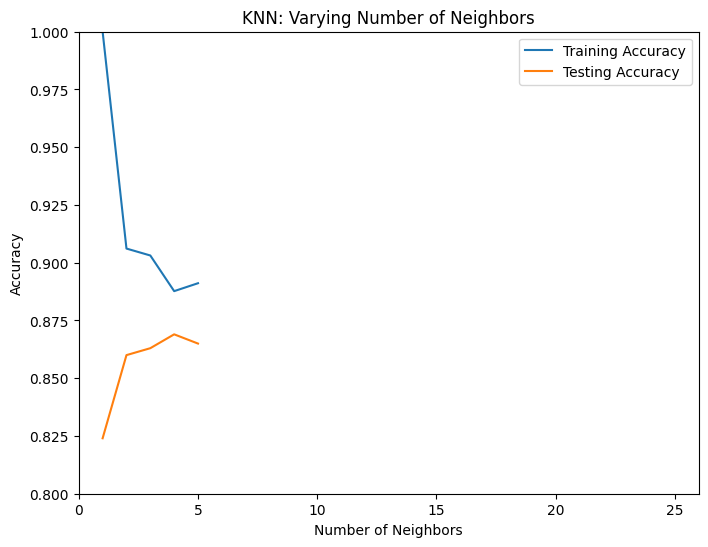

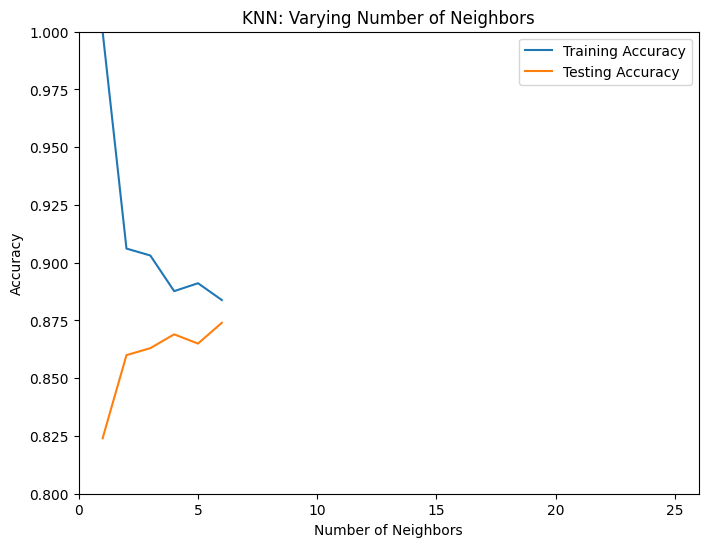

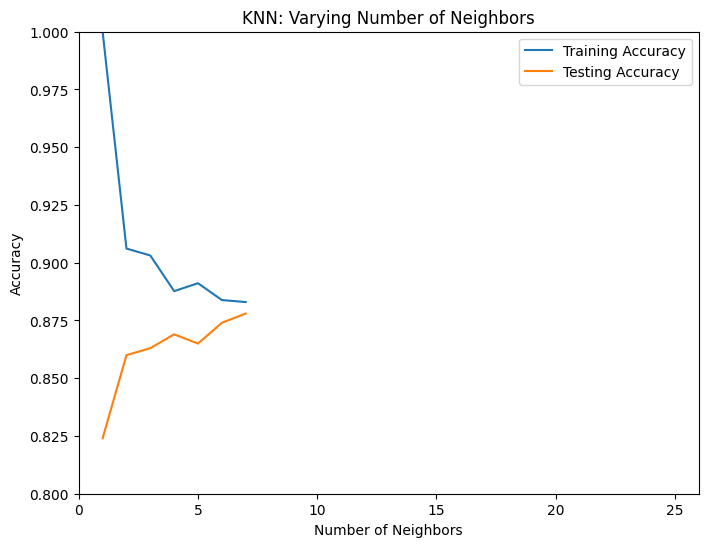

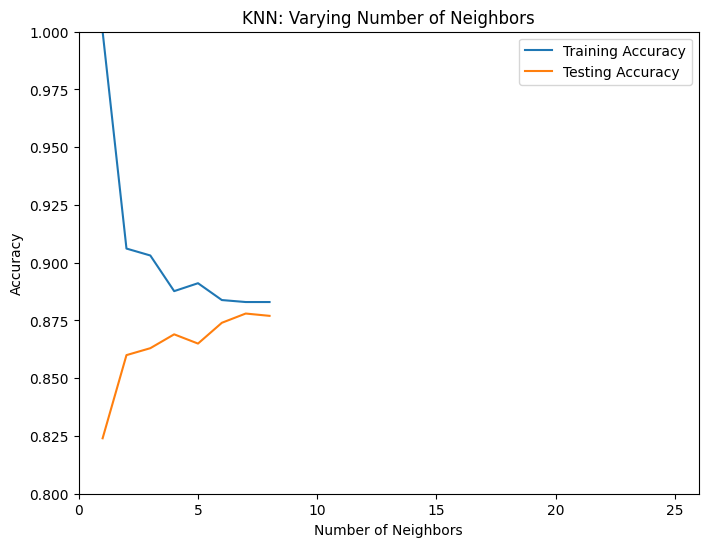

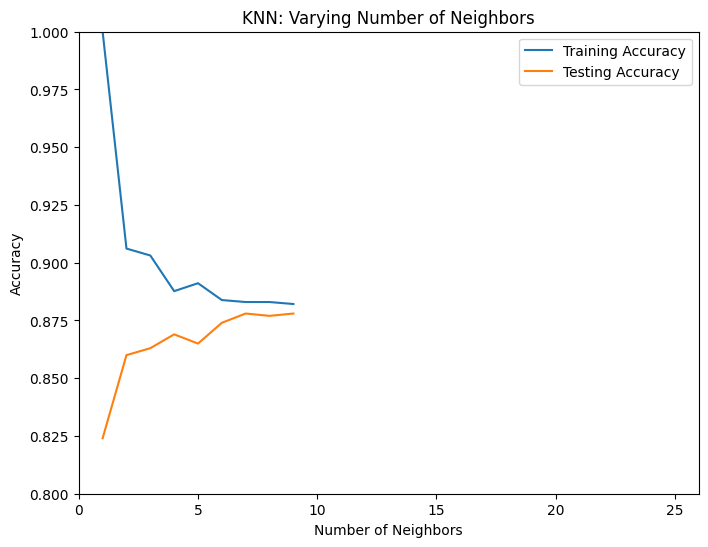

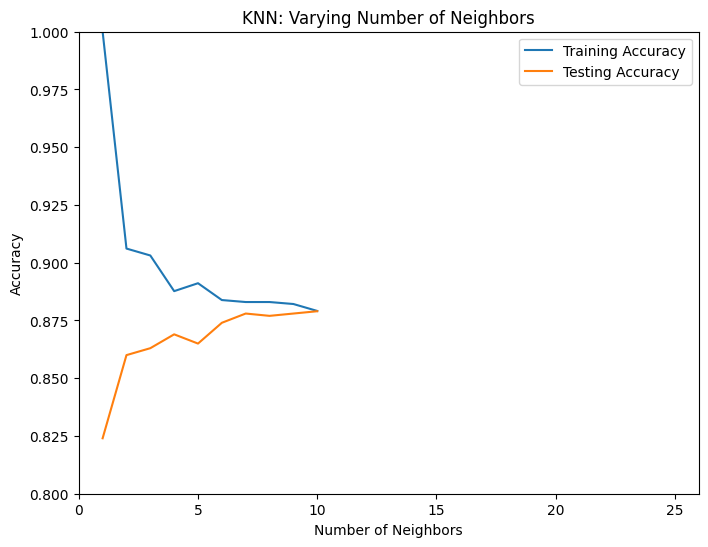

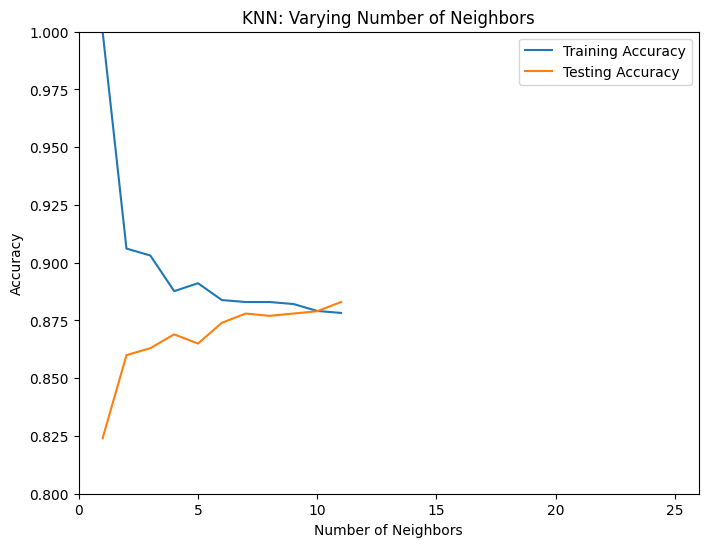

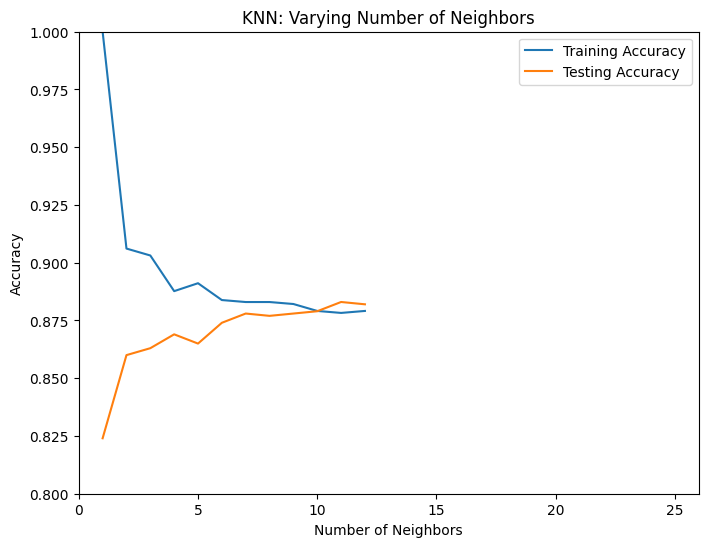

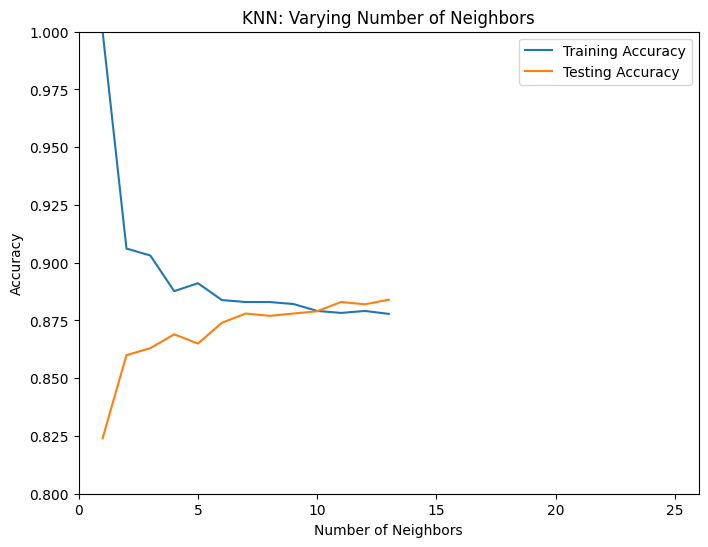

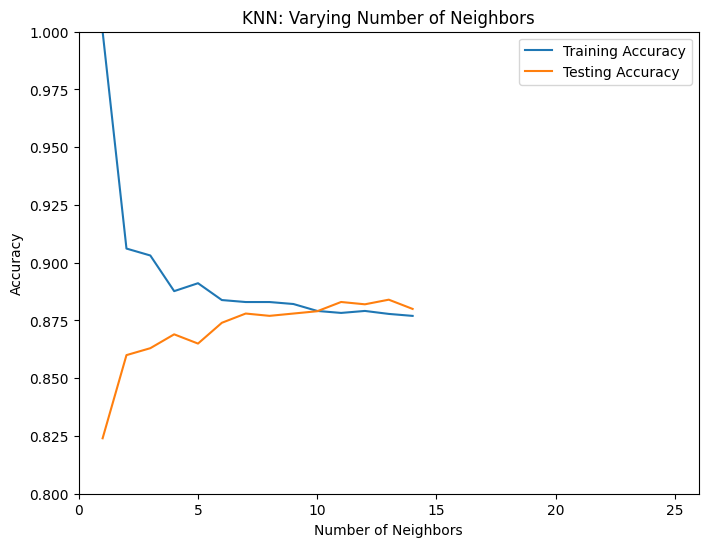

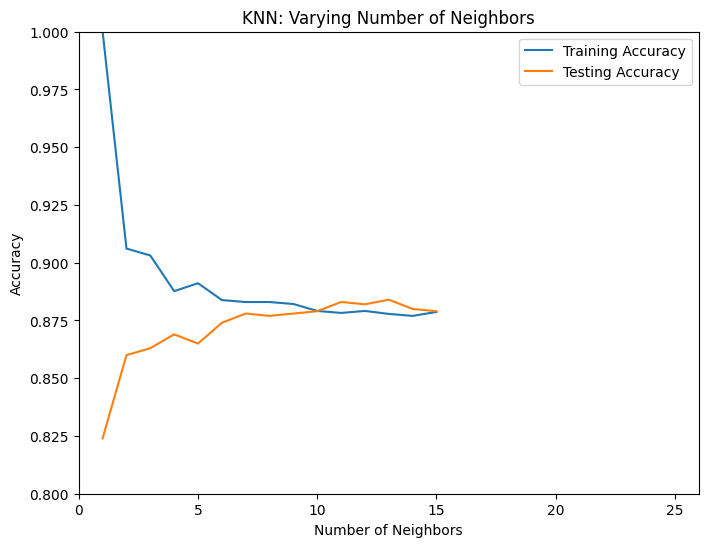

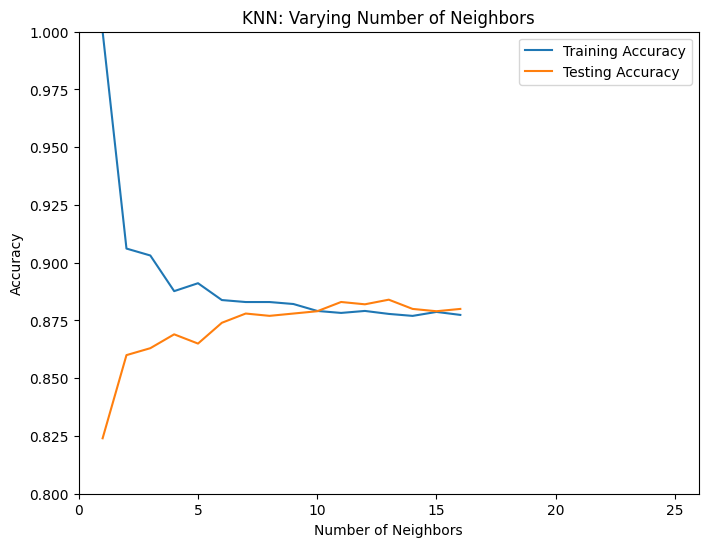

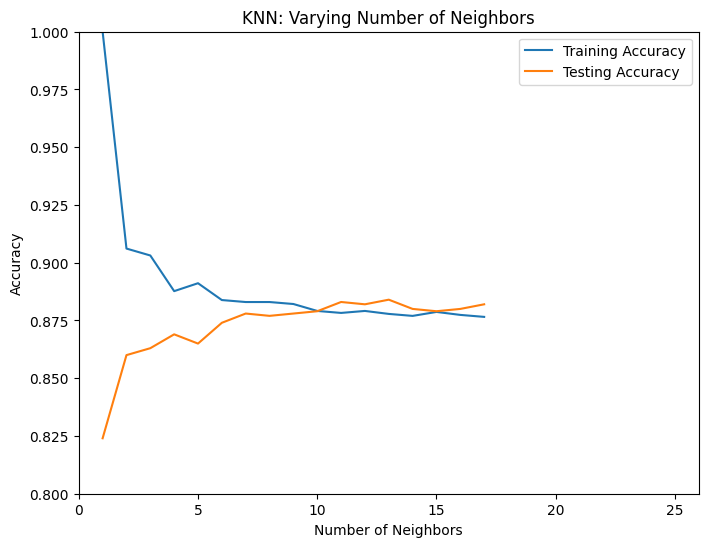

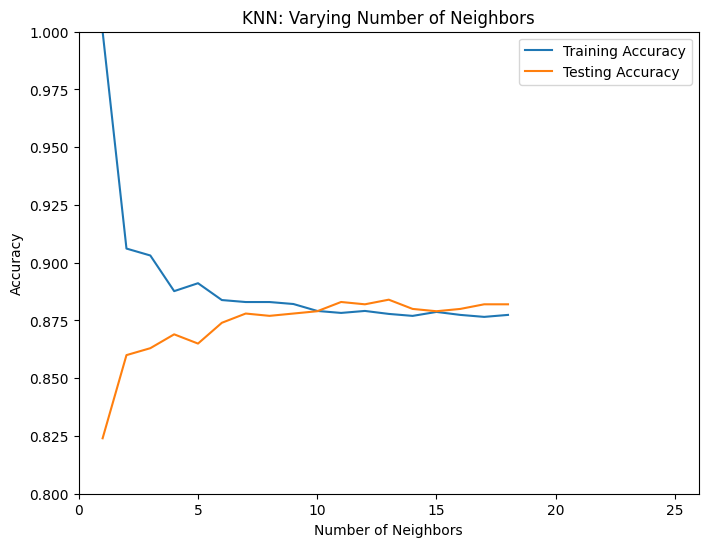

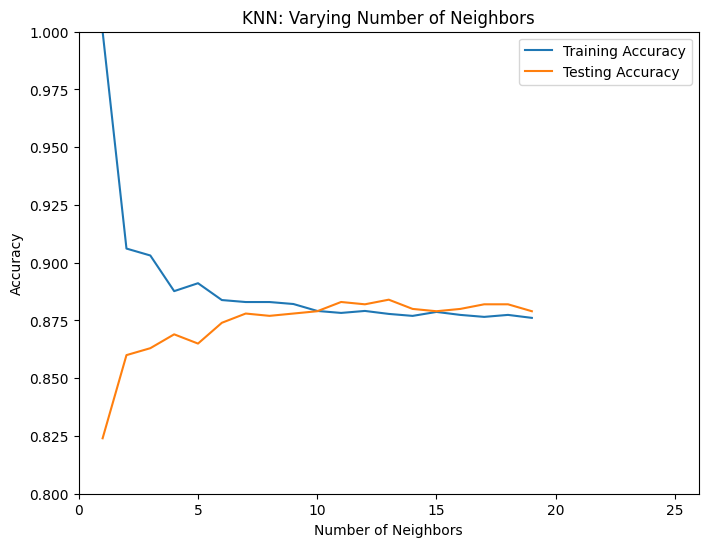

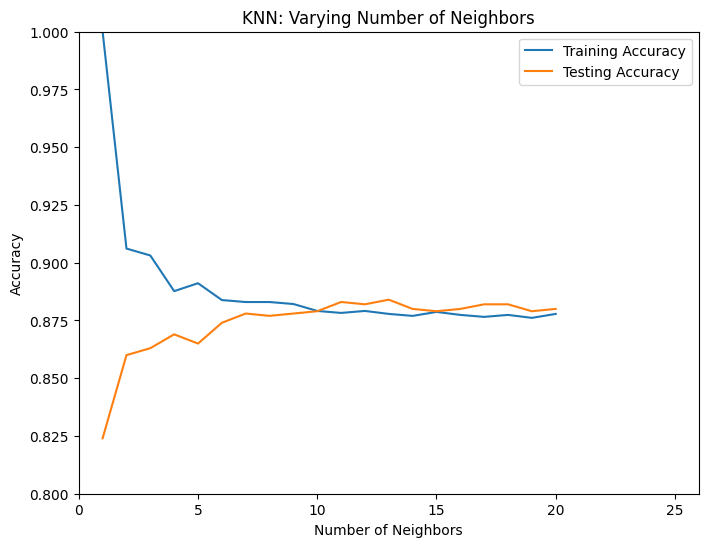

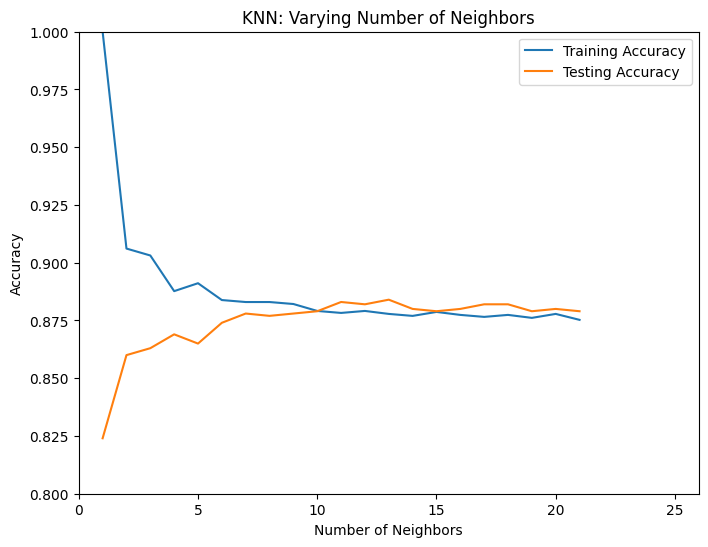

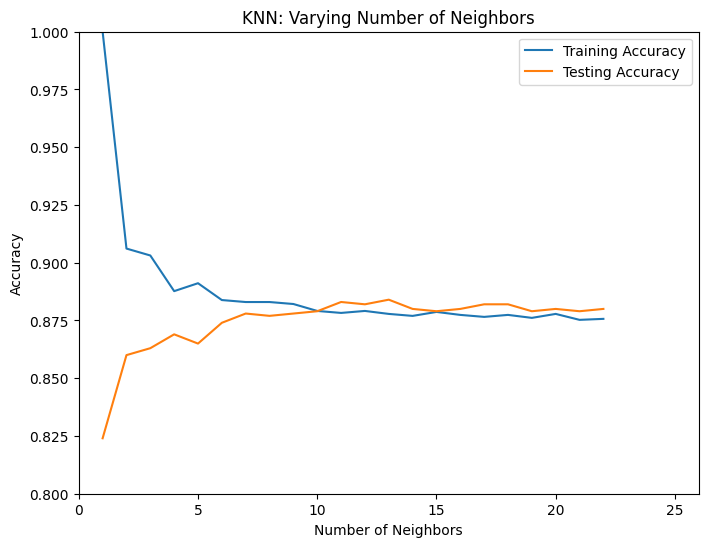

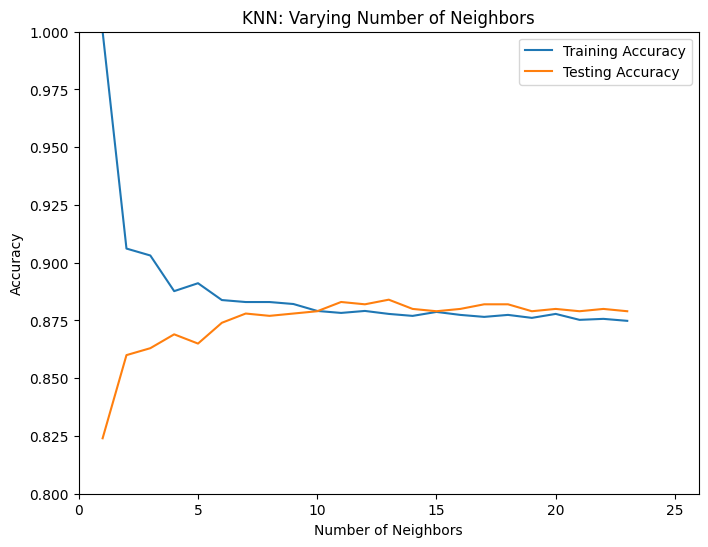

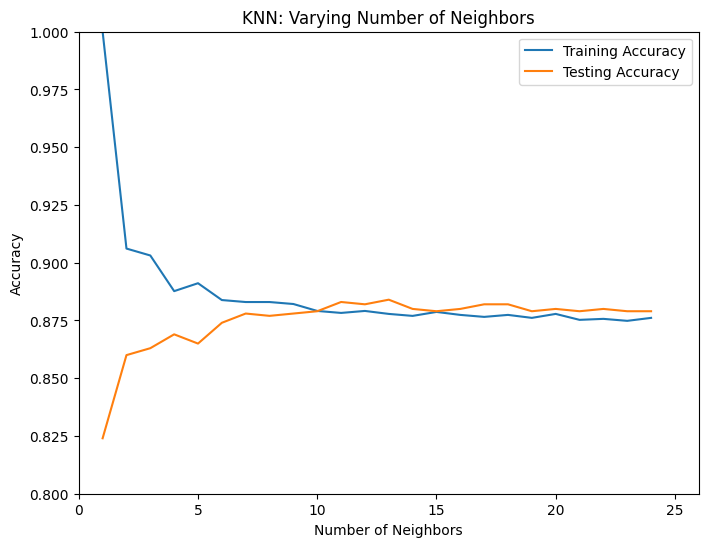

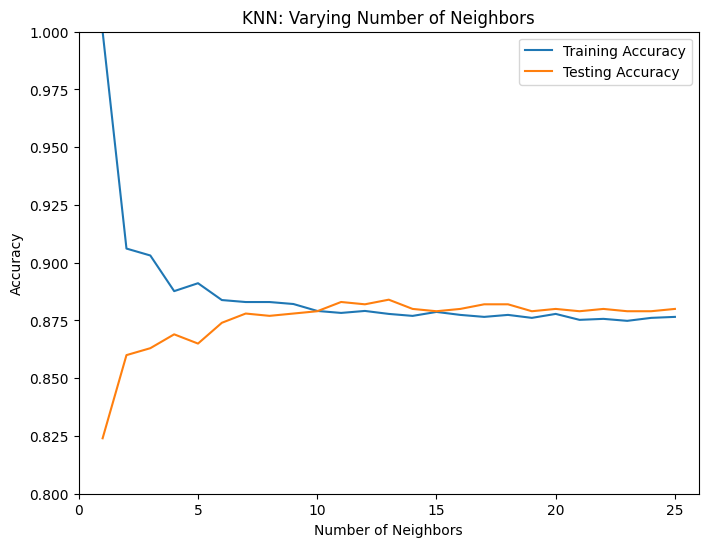

'fig=plt.figure()\nplt.plot([1,2,3,4],[1,4,3,7])\nfig.canvas.draw()\nplt.pause(0.1)\ny=int(input("y>"))\nplt.axhline(y)\nplt.show()'

In [ ]:
#Same data as previous plot, but dynamicly updating

import matplotlib
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []
neighbor_list = []
fig = plt.figure()

for neighbor in neighbors:
  train_accuracy.append(train_accuracies[neighbor])
  test_accuracy.append(test_accuracies[neighbor])
  neighbor_list.append(neighbor)
  plt.figure(figsize=(8,6))
  plt.title("KNN: Varying Number of Neighbors")
  plt.plot(neighbor_list, train_accuracy, label="Training Accuracy")
  plt.plot(neighbor_list, test_accuracy, label="Testing Accuracy")
  plt.ylim(0.8,1)
  plt.xlim(0,26)
  plt.legend()
  plt.xlabel("Number of Neighbors")
  plt.ylabel("Accuracy")
  fig.canvas.draw()
  plt.pause(0.001)
  plt.show()


'''fig=plt.figure()
plt.plot([1,2,3,4],[1,4,3,7])
fig.canvas.draw()
plt.pause(0.1)
y=int(input("y>"))
plt.axhline(y)
plt.show()'''

#Chapter 2: Regression

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


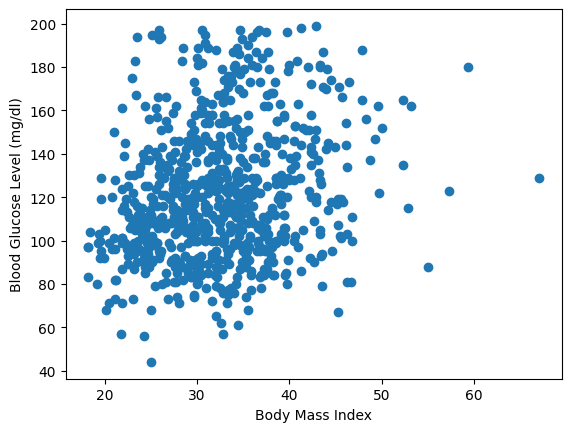

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('sample_data/diabetes_clean.csv')

'''Some observations had 0 for bmi or glucose. Below line removes them
   from the dataset'''
diabetes_df = diabetes_df[(diabetes_df['bmi'] != 0) &
                          (diabetes_df['glucose'] != 0)]

print(diabetes_df.head())

#Feature values, X
X = diabetes_df.drop('glucose', axis=1).values
#Target values, y
y = diabetes_df['glucose'].values

#Predict from single feature, in this case bmi
#bmi is 4th col of feature data, slice it with following line
X_bmi = X[:,4]
X_bmi = X_bmi.reshape(-1,1)

plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose Level (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

##Fitting a linear regression model to the data

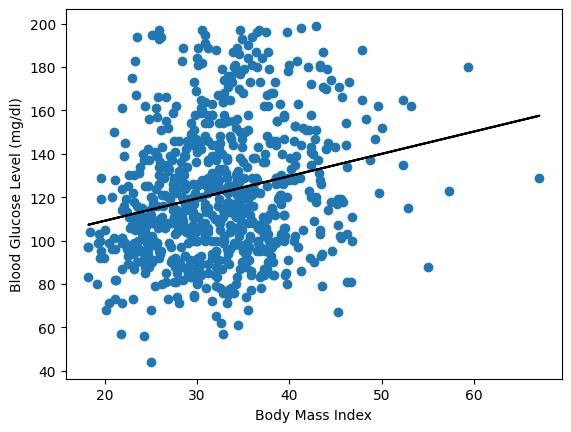

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color="black")
plt.ylabel("Blood Glucose Level (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()


##Regression mechanics
<ul>
  <li>$y = ax + b$</li>
  <ul>
    <li>Simple linear regression uses one feature</li>
    <ul>
      <li>$y$ = target</li>
      <li>$x$ = single feature</li>
      <li>$a,b$ = parameters/coefficients of the model <i>i.e.</i> slope, intercept</li>
    </ul>
  </ul>
  <li>How to choose $a,b$ ?</li>
  <ul>
    <li>Define an error function (aka loss function or cost function)</li>
    <li>Choose a line that minimizes the error function</li>
  </ul>
</ul>

###Ordinary Least Squares (OLS)
Scikit-learn uses OLS for Linear Regression
Calculate the residual sum of squares (RSS):

$RSS = \displaystyle\sum^{n}_{i=1}(y_i - \hat{y_i})^2$

###Multiple linear regression

$y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$

must specify each feature coefficient ($a_1, a_2, ... , a_n)$ and intercept, $b$

###R-squared ($R^2$)
<ul>
  <li>Default metric for linear regression</li>
  <li>Quantifies variance in target values explained by the features</li>
  <li> Ranges from 0 (poor fit) - 1 (good fit)
</ul>

##Multiple linear regression from all features of diabetes dataset:

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)


0.3538028618676814

##Mean Squared Error
$MSE = \frac{1}{n}\displaystyle\sum^{n}_{i=1}(y_i - \hat{y_i})^2$ <br>

Measured in target units, squared

##Root Mean Squared Error
$RMSE = \sqrt{MSE}$

Measured in same units as the target variable



In [56]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

#The model has an average error of blood-glucose levels of 24 mg/dl

24.07472483624122

##k-fold cross-validation
<ul>
  <li>Split dataset into $k$ folds</li>
  <li>Set aside first fold as test set, rest is training set</li>
  <li>Systematically do this for each fold</li>
  <li>more folds = more computational cost</li>
</ul>

In [58]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()

#R^2 is default value reported for linear regression
cv_results = cross_val_score(reg, X, y, cv=kf)

print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.31239631 0.39992274 0.38698031 0.19731639 0.32317527 0.3320924 ]
0.32531390402924987 0.06579003824551606
[0.21170138 0.39830494]


Recall the following about linear regression:
<ul>
  <li>minimizes the loss function</li>
  <li>chooses $a$ for each feature, and $b$</li>
  <li>large $a$ can lead to overfitting</li>
</ul>

##Regularized regression
Regularization penalizes large coefficients. <br>


##Ridge regression:
<ul>
  <li>Loss function = $\displaystyle\sum^{n}_{i=1}(y_i - \hat{y_i})^2 + α * \displaystyle\sum^{n}_{i=1} a_i^2$, where $\alpha$ is constant</li>
  <li>Penalizes large positive or negative coefficients</li>
  <li>Select the $\alpha$ which optimizes model performance</li>
  <li>$\alpha$ controls model complexity</li>
  <li>$\alpha$ is a hyperparameter, like k in KNN</li>
  <li>Loss function goes to OLS as $\alpha$ goes to 0</li>
  $\lim\limits_{\alpha \to 0} Loss function = OLS$
  <li>$\alpha$ to small -> overfitting </li>
  <li>$\alpha$ to large -> underfitting</li>
</ul>

In [39]:
from sklearn.linear_model import Ridge

scores=[]

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  scores.append(ridge.score(X_test, y_test))

print(scores)

[0.06901061707588296, 0.06901048484735717, 0.06900916219665598, 0.0689958993174502, 0.06885979961240485]


##Lasso regression:
<ul>
  <li>Loss function = $\displaystyle\sum^{n}_{i=1}(y_i - \hat{y_i})^2 + α * \displaystyle\sum^{n}_{i=1} |a_i|$, where $\alpha$ is constant</li>
  <li>Lasso can select import features from a dataset</li>
  <li>Shrinks coefficients of less important features to zero</li>
  <li>Features not shrunk to zero are selected by lasso</li>
  <li>Select the $\alpha$ which optimizes model performance</li>
  <li>IMPORTANT for justifying feature selection</li>
</ul>

In [62]:
from sklearn.linear_model import Lasso

scores=[]

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test, y_test))

print(scores)

[0.3533591880327096, 0.3438049456776029, 0.19833321142742255, 0.09544092294491002, 0.03315970152737069]


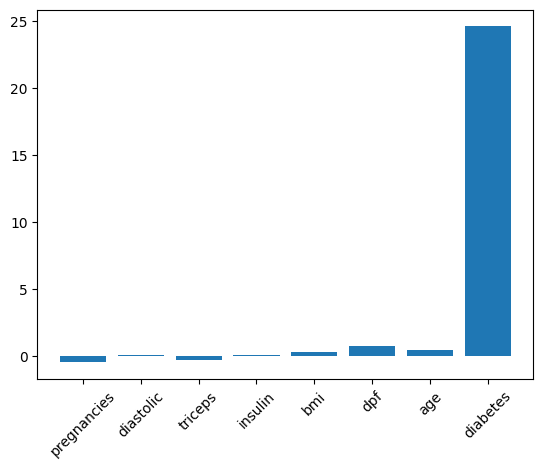

In [66]:
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('sample_data/diabetes_clean.csv')

X = diabetes_df.drop(['glucose'], axis=1).values
y = diabetes_df['glucose'].values

names = diabetes_df.drop('glucose', axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

#Chapter 3: Fine-tuning your model

Accuracy is always the best metric to assess a model. <br>
Class imbalance: Uneven frequency of classes: <br>
bank transactions (1% fraudulent) <br>
The class of interest is called the positive class. In this case fraudulent transactions<br><br>
Can construct a confusion matrix: <br>

\begin{array}{|c|c|} \hline
  & Predicted: \ Legitimate & Predicted: \ Fraudulent\\ \hline
Actual \ Legitimate& True \ Negative & False \ Positive\\\hline
Actual \ Fraudulent & False \ Negative & True \ Positive\\ \hline
\end{array} <br>

Can calculate values using the confusion matrix:

<ul>
  <li>Accuracy = $\frac{tp + tn}{tp + tn + fp + fn}$</li>

  <li>Precision (AKA positive predictive value) = $\frac{tp}{tp + fp}$</li>
  <ul>
    <li>High precision = lower false positive rate</li>
    <li>e.g. not many legitimate transactions predicted as fraudulent</li>
  </ul>
  <li>Recall (AKA sensitivity) = $\frac{tp}{tp + fn}$</li>
  <ul>
    <li>High recall = lower false negative rate</li>
    <li>e.g. predicts most fraudulent transactions correctly</li>
  </ul>
  <li>F1 score = $2 * \frac{precision \ * \ recall}{precision \ + \ recall}$</li>
  <ul>
    <li>factors in number of errors and type of errors made by the model</li>
    <li>favors models with similar precision and recall</li>
    <li>good metric to use when want a model with good precision and recall</li>
  </ul>
</ul>

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

churn_df = pd.read_csv("sample_data/telecom_churn_clean.csv")
X = churn_df[["total_day_charge","total_eve_charge"]].values
y = churn_df["churn"].values

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1111   27]
 [ 142   54]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



##Logistic regression and the ROC curve

Logistic regression:
<ul>
  <li>used for classification problems</li>
  <li>outputs probabilities</li>
  <li>produces linear decision boundary</li>
  <li>if probability, $p > 0.5$, data labeled as 1</li>
  <li>if probability, $p < 0.5$, data labeled as 0</li>
</ul>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

'''below line returns a 2D array with probabilities for both classes
   (here, churn or no churn). Slice the 2nd col and store results'''
y_pred_probs = logreg.predict_proba(X_test)[:,1]

###Receiving operating characteristic curve
Default probability threshold is 0.5, but this cn be varied.<br>
Use ROC curve to see how varying the threshold, p, affects true positive/false positive rates.<br>

When p=0 (1,1 on curve) all positive and negative values will be predicted positive.<br>
When p=1 (0,0 on curve) all positive and negative values will be predicted negative.<br>

###Plotting the ROC curve

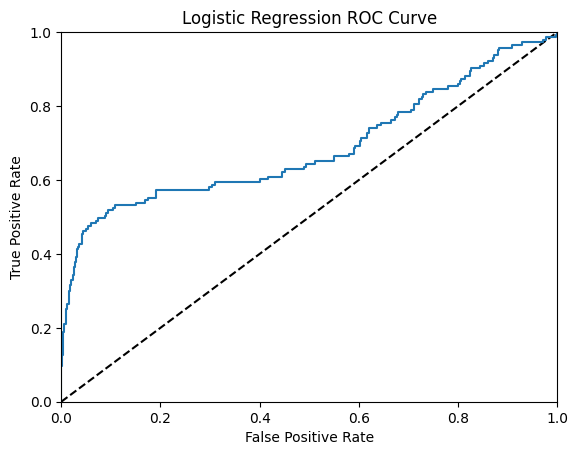

In [32]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#false pos rates, fpr, true pos rates, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

###ROC AUC
Can use this curve to quantify model by calculating the area under the ROC curve, called the ROC AUC:
<ul>
  <li>Scores range from 0-1</li>
  <li>1 being ideal</li>
</ul>

In [34]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


##Hyperparameter tuning
Hyper params are params specified before fitting a model e.g.
<ul>
  <li>KNN: n_neighbors</li>
  <li>Ridge/Lasso regression: $\alpha$</li>
</ul>

Essential to use cross-validation to avoid overfitting the test set<br>
Can still split the data and perform cross-validation on training set<br>
Withhold the test set for final evaluation<br>

Typical processes for tuning:
<ol>
  <li>Try different hyperparam values</li>
  <li>Fit them separately</li>
  <li>See how well they perform</li>
  <li>Select best performing values</li>
</ol>


###Grid Search
Choose grid of hyperparams to try.<br>
e.g. if want to find optimal hyperparam for KNN (n_neighbors):

<ol>
  <li>create a grid of possible hyperparams</li>
  <li>perform k-fold cross-validation (CV) for each combination</li>
  <li>select best combo based on mean scores</li>
</ol>

For Grid search:<br>
number of fits = # hyperparams * # values * # folds $\therefore$ does not scale well, e.g. <br>

10-fold CV, 3 hyperparams, 30 total values = 900 fits



In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid={'alpha': np.arange(0.0001, 1, 10),
            'solver': ['sag', 'lsqr']}
ridge=Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.03525257192862696


###Random Search
Less computationally intesive than Grid Search, because not exhaustive.<br>
Can specify number of random hyperparams tested.


In [44]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              'solver': ['sag', 'lsqr']}

ridge = Ridge()
#Below cmd is same as Grid search + n_iter (# rnd hyperparm values tested)
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.035258923332301094


#Chapter 3: Preprocessing and Pipelines

Scikit-learn requires numerical data w/o missing values. <br>
This is rarely the case with real-world data, so need to preprocess.

##Categorical Data

<ul>
  <li>sklearn won't accept categorical data</li>
  <li>convert features into numerical values</li>
  <li>Convert to binary features: dummy variables</li>
  <ul>
    <li>0: Observation was NOT in that category</li>
    <li>1: Observation WAS in that category </li>
  </ul>
</ul>

e.g. song genres: <br>

\begin{array}{|c|c|c|} \hline
Genre & Alternative & Blues & Rock\\ \hline
Alternative & 1 & 0 & 0\\\hline
Blues & 0 & 1 & 0\\ \hline
Rock & 0 & 0 & 1\\ \hline
\end{array} <br>

In this example if a song is not alternative or blue, it is implicitly rock. <br>
Good practice to drop last dummy variable. This prevents duplication of data, which can be an issue for some models.<br>

Thus $n$ categories require $n - 1$ dummy variables. <br>

Dummy variables can be created with either:
<ul>
  <li>scikit-learn: OneHotEncoder()</li>
  <li>pandas: get_dummies()</li>
</ul>

###Music dataset

<ul>
  <li>Target feature:popularity</li>
  <li>Categorical feature: genre</li>
</ul>

In [74]:
import pandas as pd

'''Below code will not work properly for 'music_clean.csv'
   Course didn't provide original 'music.csv' file'''

music_df = pd.read_csv('sample_data/music_clean.csv')

#drop_first keeps only n-1 binary features
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
print(music_dummies.head())

music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies.drop('genre', axis=1)

'''If the DataFrame has only one categorical variable, can simplify the above.
   If a column is not specified, the new DataFrae's binary columns will have the
   original feature name prefixed, e.g. 'genre_'''

music_dummies = pd.get_dummies(music_df, drop_first=True)

      1
0  True
1  True
2  True
3  True
4  True


##Linear regression with dummy variables


In [75]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()

'''sklearn's CV metrics presume higher = better, so use
   neg_mean_squred_error to compensate for this'''

linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf,
                            scoring='neg_mean_squared_error')
rmse = np.sqrt(-linreg_cv)

##Handling missing data

No value for a feature in a particular row
<ul>
  <li>may have been no observation</li>
  <li>data may be corrupt</li>
</ul>

Check DataFrame for missing values with the following code:

In [76]:
'''Below code will return 0 missing values as the course
   only provides the cleaned dataset.'''

music_df.isna().sum().sort_values()

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

###Drop missing data
Common approach when missing values represent <= 5% of the data. <br>
Assume below features are missing < 5% of their data:

```python
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness',
                                   'liveness', 'tempo'])
```

###Impute missing data
Making an educated guess as to the values of the missing datapoints. <br>

<ul>
  <li>Common appraoch to use mean</li>
  <li>Can also use median or other value</li>
  <li>For categorixal values, usu. use mode</li>
  <li>must first split data, to avoid data leakage</li>
</ul>

Data leakage is when test-set data is accidentally sent to model. <br>




In [77]:
from sklearn.impute import SimpleImputer

X_cat = music_df["genre"].values.reshape(-1,1)
X_num = music_df.drop(['genre','popularity'], axis=1).values
y = music_df['popularity'].values
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2,
                                                            random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2,
                                                            random_state=12)

##Imputing categorical data##

#By default impute expects np.nan to represent missing values
imp_cat= SimpleImputer(strategy='most_frequent')

X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.fit_transform(X_test_cat)

##Imputing numerical data##
imp_num = SimpleImputer()

X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.fit_transform(X_test_num)

##Combining categorical and numerical data##
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)



###Imputing with a pipline

Each step in a pipeline, except the last, must be a transformer.<br>
Below example determines if genre is rock

In [83]:
from sklearn.pipeline import Pipeline

#Drop missing data if it represents <= 5% of overall data for the column
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness',
                                   'liveness', 'tempo'])

#Set all genres to either 'Rock' or 'Not Rock' (1,0)
music_df['genre' == np.where(music_df['genre'] == 'Rock', 1, 0)]

X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values

#Construct list of steps containing tuples
steps = [('imputation', SimpleImputer()), ('logistic_regression',
                                           LogisticRegression())]
#Pass list when instantiating a pipeline
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)



0.8033333333333333

###Transformers

Imputers are an example of a transformer, as they transform data.<br>

##Centering and scaling

Why scale data?
<ul>
  <li>Many models use distance to inform them</li>
  <li>Features with larger scales can disproportionately influence model</li>
</ul>

Achieve this by normalizing (scaling) or standardizing (centering) our data.


###Scaling data

Can scale data by:

<ul>
  <li>Subtract the mean, divide by the variance (standardization)</li>
  <ul>
    <li>All features centered around 0</li>
    <li>All features have variance of 1</li>
  </ul>
  <li>Subtract the min, divide by the range</li>
  <ul>
    <li>Minimum 0</li>
    <li>Maximum 1</li>
  </ul>
</ul>

Can also normalize so data ranges from -1 to 1.<br>
Scikit-learn has other ways to scale data. Refer to the docs.<br>



In [79]:
from sklearn.preprocessing import StandardScaler

X=music_df.drop('genre', axis=1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


###Scaling in a pipeline

In [81]:
steps = [(('scaler'), StandardScaler),
         (('knn'), KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)

#Compared to unscaled data:
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)


AttributeError: 'numpy.ndarray' object has no attribute 'fit'

###CV in a pipeline

In [82]:
from sklearn.model_selection import GridSearchCV

steps = [(('scaler'), StandardScaler),
         (('knn'), KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors': np.arange(1,50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_score_)
print(cv.best_params_)

TypeError: BaseEstimator.get_params() missing 1 required positional argument: 'self'

##Evaluating multiple models

General guidelines for model selection:
<ul>
  <li>Size of the dataset</li>
  <ul>
    <li>Fewer features = simpler model (faster training time)</li>
    <li>Some models require large datasets to perform well</li>
  </ul>
  <li>Interpretability</li>
  <ul>
    <li>Some models easier to explain (important for stakeholders)</li>
    <li>e.g. linear regression has high interpretability (we understand the coeffs)</li>
  </ul>
  <li>Flexbility</li>
  <ul>
    <li>Making fewer assumptions about the data may improve accuracy</li>
    <li>e.g. KNN is more flexible (doesn't assume any linear relationships)</li>
  </ul>
</ul>

Scikit-learn allows the same methods to be used for most models.<br>
This makes it easier to compare models.<br>


###Model metrics

Performance metrics for different models:

<ul>
  <li>Regression</li>
  <ul>
    <li>RMSE</li>
    <li>R-squared</li>
  </ul>
  <li>Classification</li>
  <ul>
    <li>Accuracy, Precision, Recall, F1-score </li>
    <li>Confusion matrix</li>
    <li>ROC AUC</li>
  </ul>
</ul>

###'Out of the box' evaluation

Common approach is to train several models 'out of the box' (no hyperparam tuning),<br>
then compare their performance.

NOTE: best to scale data BEFORE evaluating models.<br>

Models affected by scaling:
<ul>
  <li>KNN</li>
  <li>Linear Regression</li>
  <li>Logistic Regression</li>
  <li>Artifical Neural Network</li>
</ul>

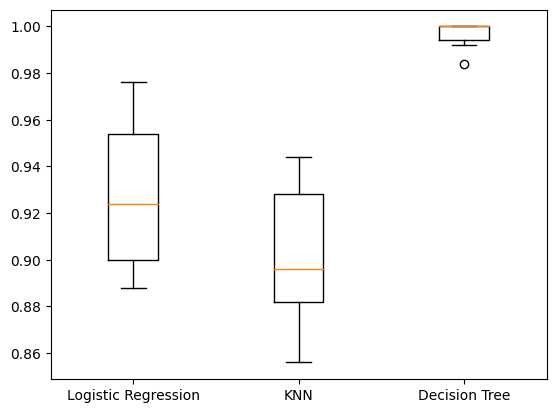

Logistic Regression Test Set Accuracy: 0.868
KNN Test Set Accuracy: 0.88
Decision Tree Test Set Accuracy: 0.992


In [89]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Create dict of models to be evaluated
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier()}

results = []

for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)
  print(f'{name} Test Set Accuracy: {test_score}')

In the plot above, the orange line represents the mediam CV-score. Higher = better.

#Summary

Topics covered:
<ul>
  <li>Supervised learning for predictive models</li>
    <ul>
      <li>Regression</li>
      <li>Classification</li>
    </ul>
  <li>Underfitting/Overfitting</li>
  <li>Splitting data</li>
  <li>Cross-validation</li>
  <li>Data preprocessing</li>
  <li>Model Selection</li>
  <li>Hyperparamter Tuning</li>
  <li>Model performance evaluation</li>
  <li>Pipelines</li>
</ul>

Where to go from here (with Python):

<ul>
  <li>ML with tree-based models</li>
  <li>Preprocessing for ML</li>
  <li>Model validation</li>
  <li>Feature engineering for ML</li>
  <li>Unsupervised learning </li>
  <li>ML projects</li>
</ul>